# GMM이란?
GMM(Gaussian Mixture Model)은 데이터가 서로 다른 k 개의 정규분포에서 생성되었다고 가정합니다.    
정규분포란 평균을 중심으로 대칭이며 표준편차에 따라 흩어진 정도가 정해지는 분포를 뜻하는데요.   
데이터가 정규 분포를 따를 때 가장 큰 이점은 값이 특정 구간에 속할 확률을 계산할 수 있다는 점입니다. GMM은 이 확률을 통해서 클러스터를 구분합니다.

특정 데이터의 값이 어떤 분포에 포함될 확률이 더 큰지를 따져서 각 클러스터로 구분하는 게 GMM의 방법론입니다.   
GMM은 클러스터별로 중심(평균)을 표현하면서 분산의 구조도 함께 띄고 있는 데이터 세트에 효과적입니다.   
예를 들어서, 데이터가 원형으로 흩어져 있으면 평균은 있지만 분산이 없는 데이터라고 할 수 있는데요. 이런 경우에는 k-means를 사용하는 게 더 적합하겠죠?   
반면, 데이터가 타원형으로 흩어져 있다면 중심(평균)과 분산의 값을 갖는 형태이기 때문에, 이러한 상황에서는 GMM 모델을 적용하는 게 적합합니다.

#### GMM의 단점
- k-means와 비슷하게 사전에 클러스터 개수를 임의로 설정해야 하며, 그 값에 따라서 결과가 달라질 수 있습니다.
- 또, 특정 분포에 할당되는 데이터 수가 적으면 모수 추정이 잘 이뤄지지 않기 때문에, 충분히 많은 수의 데이터가 있지 않으면 적용하기 어렵습니다.
- 마지막으로 정규 분포를 따른다고 가정하는 데이터를 구분해 주는 방법이기 때문에, 정규 분포가 나올 수 없는 범주형 데이터는 다룰 수 없습니다.

<Axes: xlabel='0', ylabel='1'>

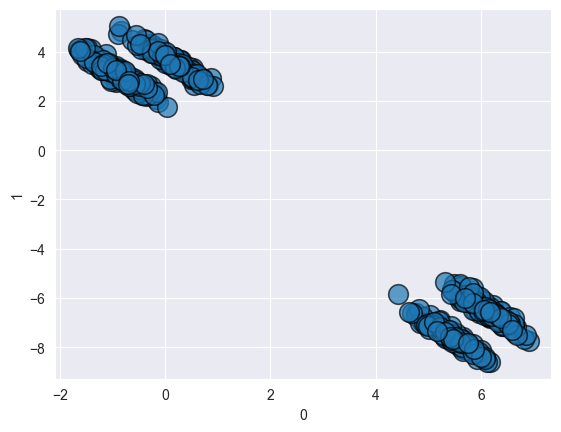

In [20]:
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd

n_samples = 500   # 샘플 데이터 개수
centers = 4   # 클러스터 개수
cluster_std = 0.5   # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정
 
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.8]]
data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)

# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor="k", s=200)

타원형 학습 데이터를 가지고 k-means와 GMM 모델 각각으로 클러스터링

#### K-means

<Axes: xlabel='0', ylabel='1'>

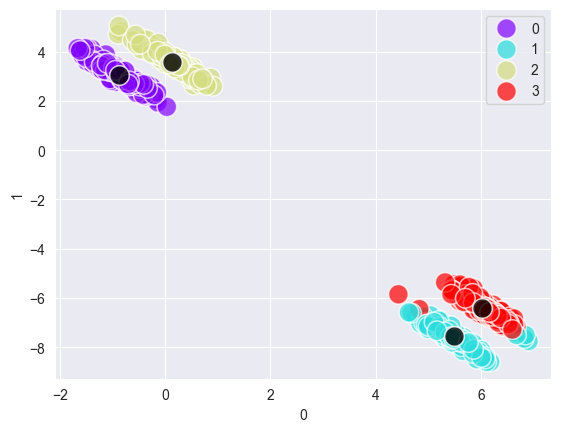

In [21]:
from sklearn.cluster import KMeans
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)

#### GMM

In [22]:
df = df.drop(columns=['kmeans_label'], axis=1)

<Axes: xlabel='0', ylabel='1'>

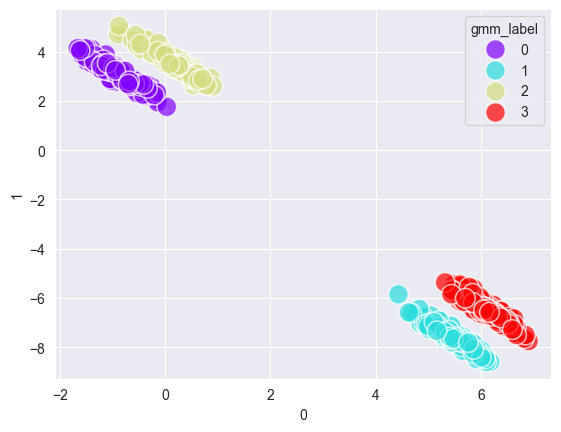

In [23]:
    from sklearn.mixture import GaussianMixture

n_components = 4    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1],  hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=200)

타원형의 데이터는 k-means로 클러스터링이 잘 되지 않았지만 GMM으론 4개의 타원형 분포에 맞게 클러스터링이 잘 되었습니다.